In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('_mpl-gallery')

In [6]:
# Import data
data = pd.read_excel('data.xlsx', 'Timepoint 1')

In [3]:
a = np.array(data)[:,:]

In [4]:
# Split dataset into indices, labels and data
indices = a[1:, 0]
features = a[0, 3:]
labels = a[1:, 2]
tx = a[1:, 3:]

In [5]:
# Format data
## Set 0 values to -999 (undefined)
tx[:, 1:] = np.where(tx[:, 1:] == 0, -999, tx[:,1:])

## Format sex feature
# Male = 0, Female = 1
tx[np.where(tx[:, 0] == 'Male'), 0] = 0;
tx[np.where(tx[:, 0] == 'Female'), 0] = 1;
tx = np.array(tx, dtype='float')

In [6]:
def clean_data(data):
    # If more than 75% of -999, remove
    del_col = np.array(np.where(np.sum(data == -999, axis=0)/data.shape[0] > .75))
    del_col = del_col[del_col!=0]
    data = np.delete(data, del_col, axis=1)

    # Replace -999 by nan
    data = np.where(data == -999, np.nan, data)
    
    # Compute the columns means without nan values 
    means = np.nanmean(data, axis=0)
    
    #Find indices that you need to replace
    inds = np.where(np.isnan(data))
    
    #Place column means in the indices. Align the arrays using take
    data[inds] = np.take(means, inds[1])
    return data, del_col

In [7]:
# Clean data
tx_train, del_col = clean_data(tx)
features_clean = np.delete(features, del_col)

# Data visualization

In [8]:
df = pd.DataFrame(tx_train[:,:], columns=features_clean[:])
df.insert(0, "Age", np.array(labels, dtype='float'), True)

In [9]:
corrmax = df.corr().abs()

In [10]:
corrmax

Index(['Age', 'Sex', '[norm] Brain tissue total volume',
       '[norm] 3rd ventricle total volume',
       '[norm] 4th ventricle total volume',
       '[norm] Accumbens area right volume',
       '[norm] Accumbens area left volume', '[norm] Amygdala right volume',
       '[norm] Amygdala left volume', '[norm] Brain stem total volume',
       ...
       '[norm] Frontal GCA - Parietal GCA',
       '[norm] Anterior vs, posterior index',
       '[norm] Hippocampus ROI total CN similarity',
       '[norm] Hippocampus ROI total AD similarity',
       '[norm] Hippocampus ROI total FTLD similarity',
       '[norm] Hippocampus ROI total DLB similarity',
       '[norm] Frontal ROI total CN similarity',
       '[norm] Frontal ROI total AD similarity',
       '[norm] Frontal ROI total FTLD similarity',
       '[norm] Frontal ROI total DLB similarity'],
      dtype='object', length=290)

In [11]:
sol = (corrmax.where(np.triu(np.ones(corrmax.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [15]:
sol.to_excel('correlation.xlsx')

In [49]:
sol = pd.DataFrame(sol)

In [54]:
sol.head(50)

0
[norm] Cerebral gray matter right volume           [norm] Cortical gray matter right volume            0.996202
[norm] Cerebral gray matter total volume           [norm] Cortical gray matter total volume            0.996043
[norm] Cerebral gray matter left volume            [norm] Cortical gray matter left volume             0.995791
[norm] Cerebral white matter right volume          [norm] Cerebral white matter total volume           0.992540
[norm] Cerebral white matter left volume           [norm] Cerebral white matter total volume           0.992502
[norm] Cortical gray matter total volume           [norm] Cortical gray matter right volume            0.992455
[norm] Cerebral gray matter total volume           [norm] Cerebral gray matter right volume            0.992359
                                                   [norm] Cerebral gray matter left volume             0.992345
[norm] Cortical gray matter total volume           [norm] Cortical gray matter left volume             0.992312
[norm] Cerebral gray matter right volume           [norm] Cortical gray matter total volume            0.989624
[norm] Cerebral gray matter total volume           [norm] Cortical gray matter left volume             0.989249
                                                   [norm] Cortical gray matter right volume            0.987610
[norm] Cerebral gray matter left volume            [norm] Cortical gray matter total volume            0.987433
[norm] Cerebral gray matter total Computed GCA     [norm] Cortical gray matter total Computed GCA      0.985174
[norm] Cerebral white matter right volume          [norm] Cerebral white matter left volume            0.970868
[norm] Cortical gray matter right volume           [norm] Cortical gray matter left volume             0.969758
[norm] Cerebral gray matter right volume           [norm] Cerebral gray matter left volume             0.969609
                                                   [norm] Cortical gray matter left volume             0.967833
[norm] Cerebral gray matter left Computed GCA      [norm] Cortical gray matter left Computed GCA       0.967235
[norm] Cerebral gray matter left volume            [norm] Cortical gray matter right volume            0.964219
[norm] Lateral ventricle left volume               [norm] Cerebrospinal fluid total volume             0.962382
[norm] Frontal lobe right volume                   [norm] Frontal lobe left volume                     0.959731
[norm] Cerebellum exterior right volume            [norm] Cerebellum exterior left volume              0.955015
[norm] Cortical gray matter total Computed GCA     [norm] Cortical gray matter left Computed GCA       0.954085
[norm] Cerebral gray matter right Computed GCA     [norm] Cortical gray matter right Computed GCA      0.950444
[norm] Lateral ventricle right volume              [norm] Cerebrospinal fluid total volume             0.945595
[norm] Cerebellar vermal lobules I-V total volume  [norm] Cerebellar vermal lobules VI-VII total v...  0.943638
[norm] Cerebral gray matter total Computed GCA     [norm] Cortical gray matter left Computed GCA       0.943148
                                                   [norm] Cerebral gray matter left Computed GCA       0.936438
[norm] Cerebellar vermal lobules VI-VII total v... [norm] Cerebellar vermal lobules VIII-X total v...  0.935182
[norm] Cerebral gray matter left Computed GCA      [norm] Cortical gray matter total Computed GCA      0.934196
[norm] Ventral diencephalon right volume           [norm] Ventral diencephalon left volume             0.932235
[norm] Cortical gray matter total Computed GCA     [norm] Cortical gray matter right Computed GCA      0.931601
[norm] Cerebral gray matter total Computed GCA     [norm] Cortical gray matter right Computed GCA      0.930014
[norm] Cerebellar vermal lobules I-V total volume  [norm] Cerebellar vermal lobules VIII-X total v...  0.928597
[norm] Cerebral gray matter total Computed GCA     [norm] Cerebral gray matter

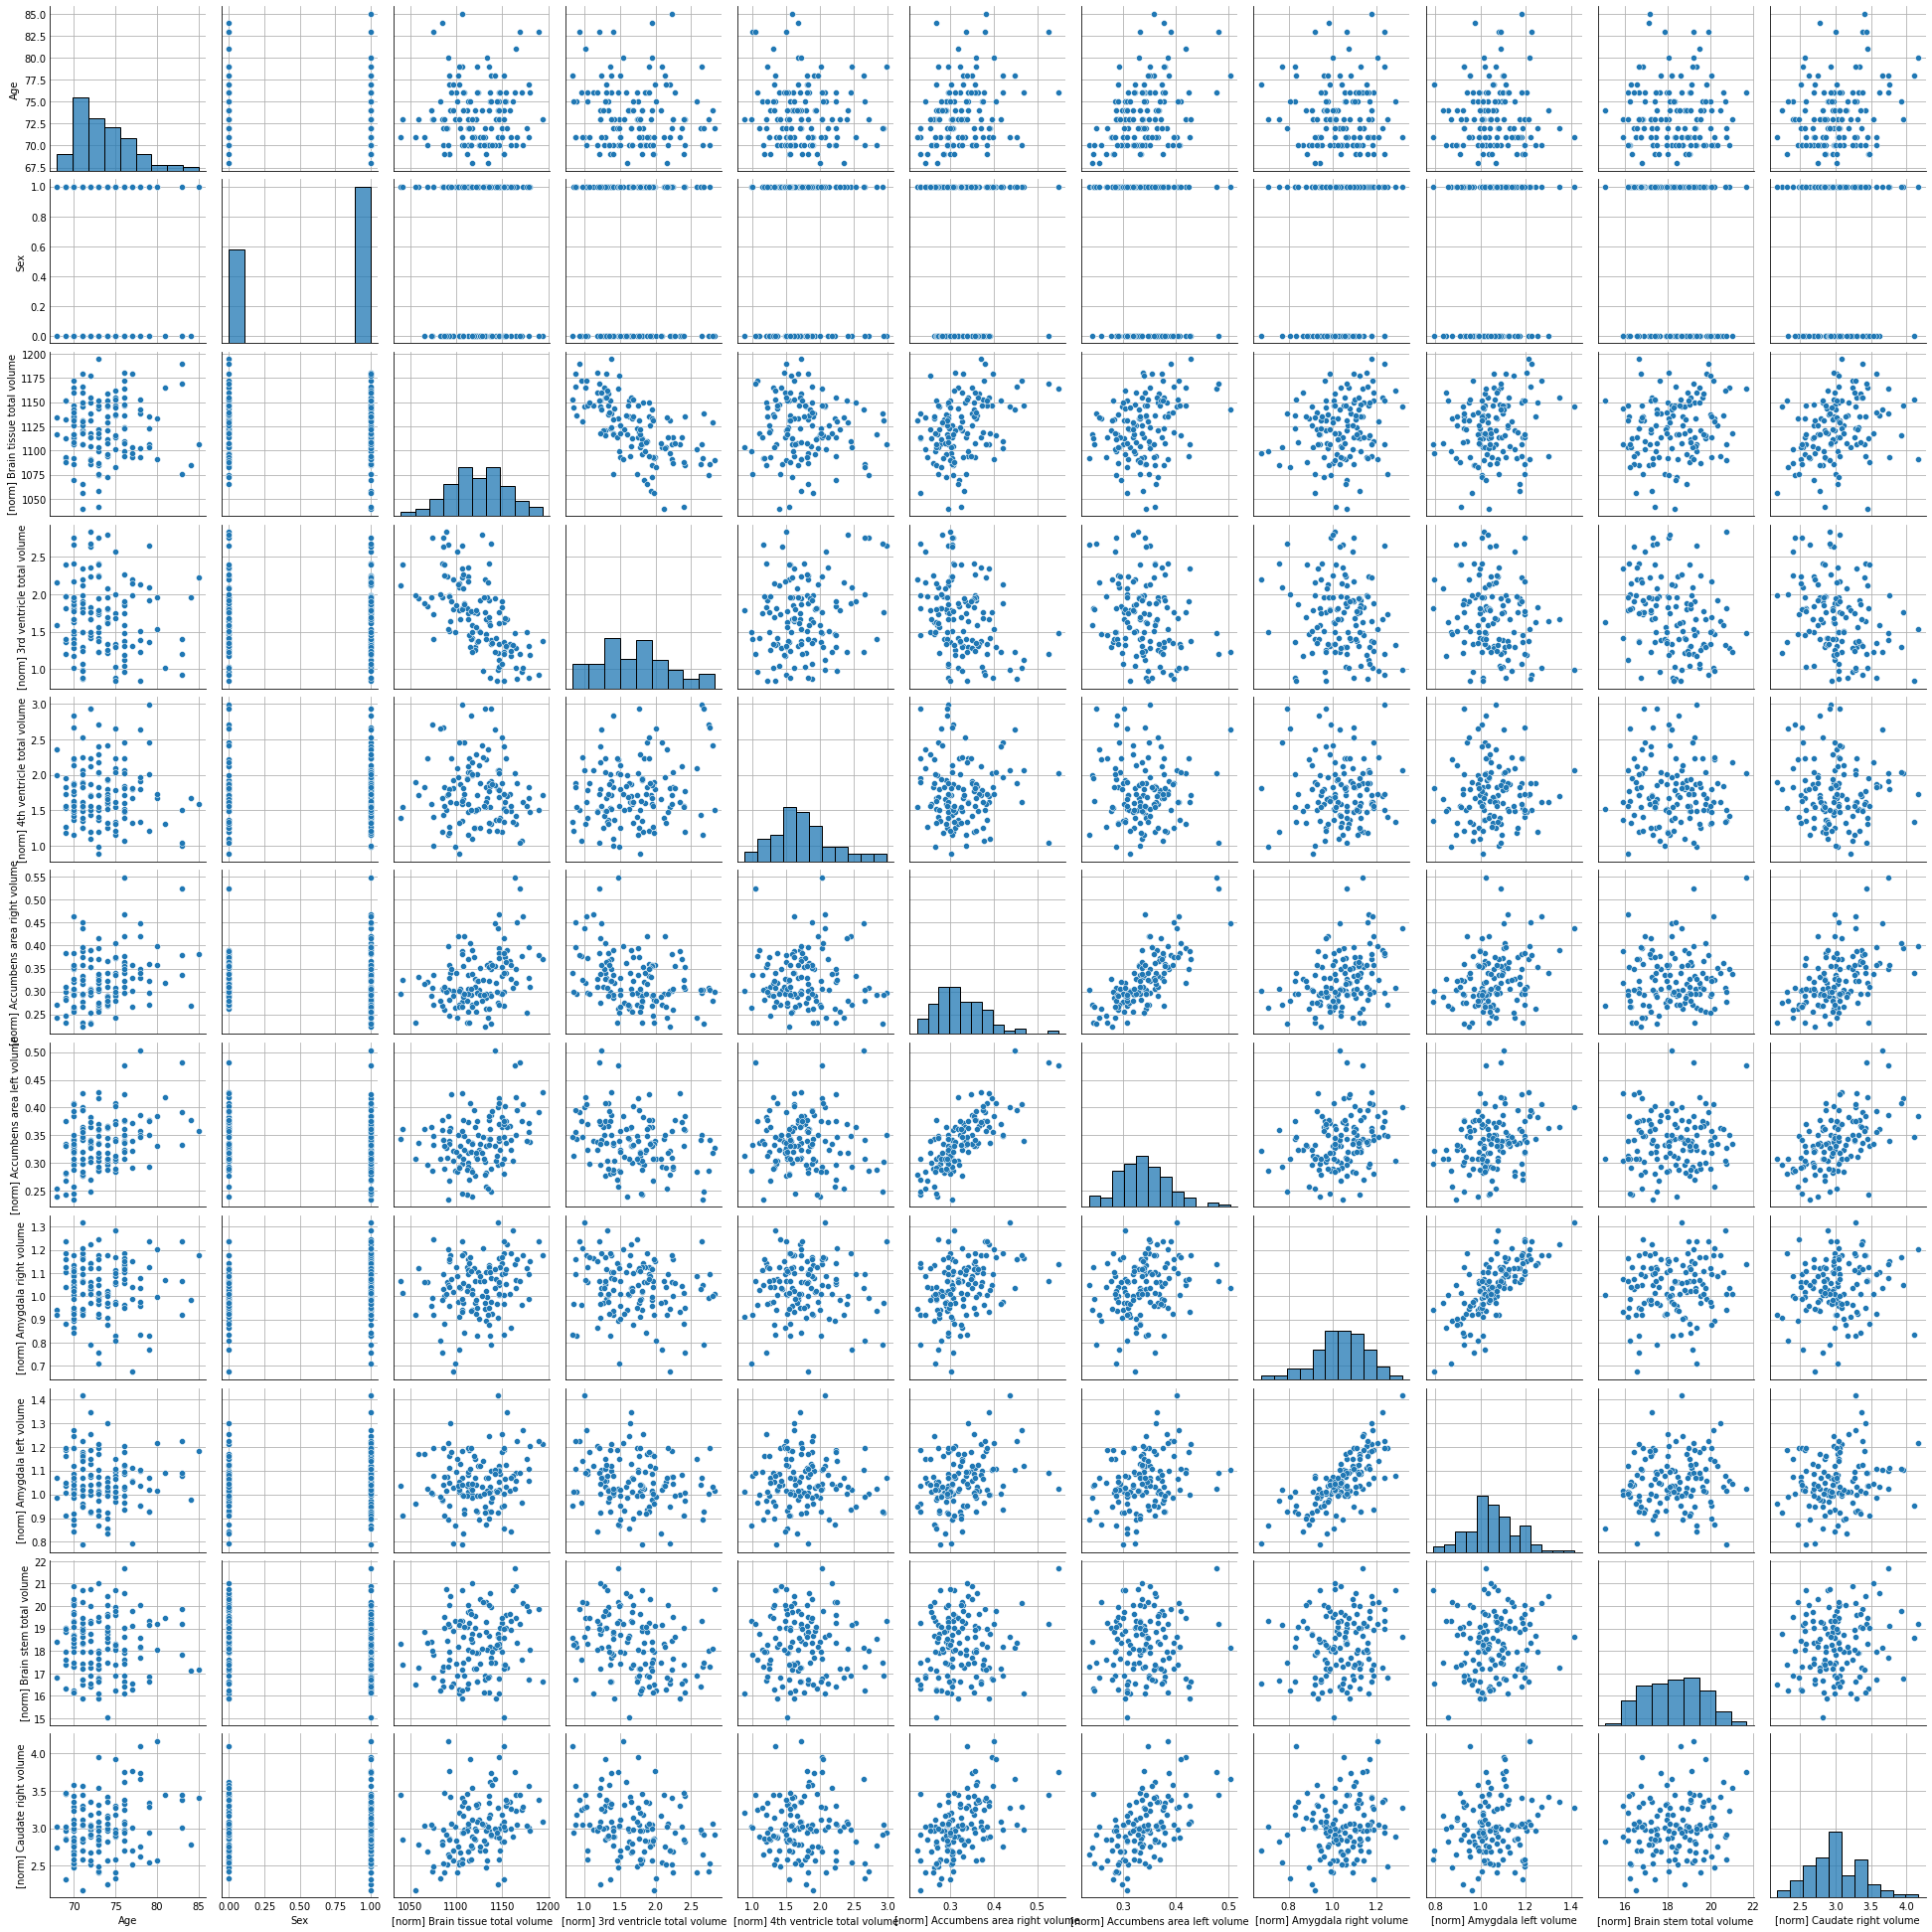

In [427]:
sns.pairplot(df)

/var/folders/nb/xkb6gsv52xq9t6plg99f32v80000gn/T/ipykernel_974/870278953.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


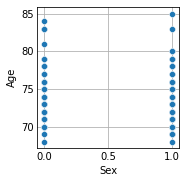

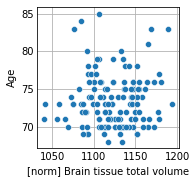

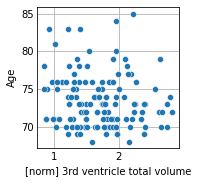

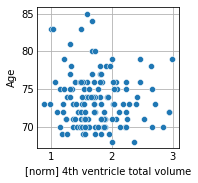

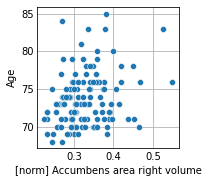

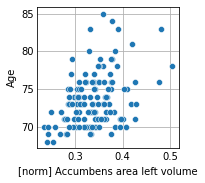

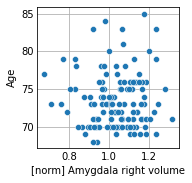

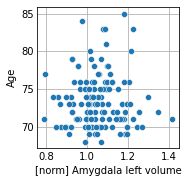

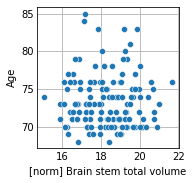

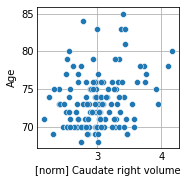

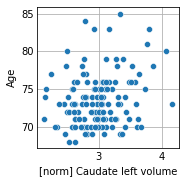

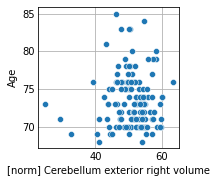

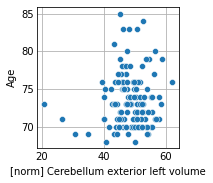

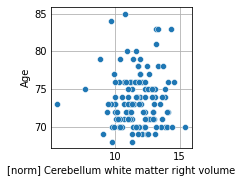

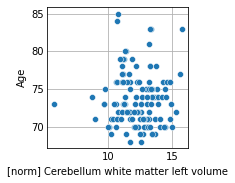

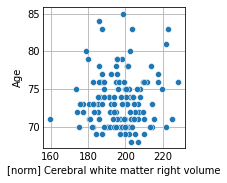

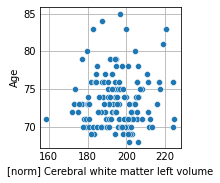

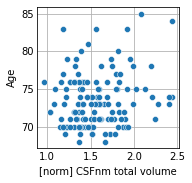

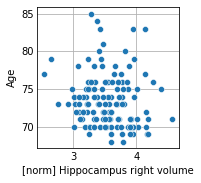

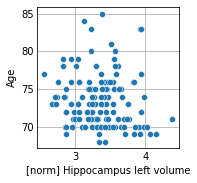

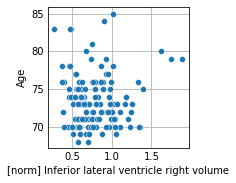

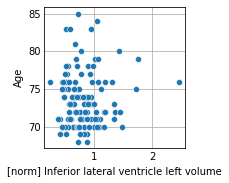

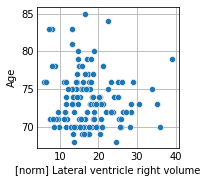

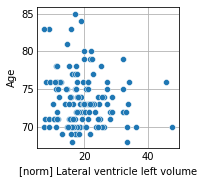

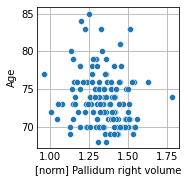

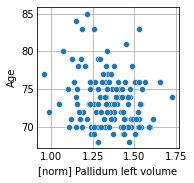

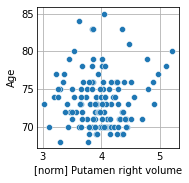

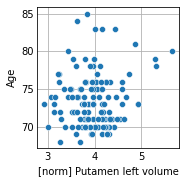

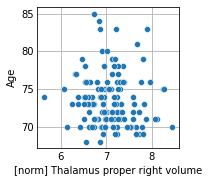

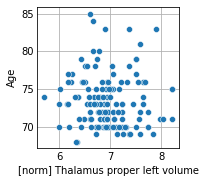

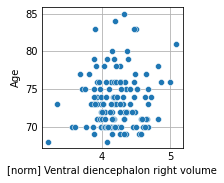

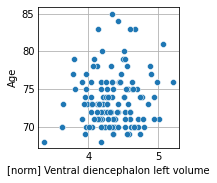

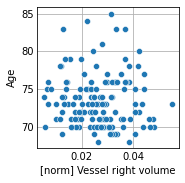

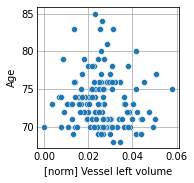

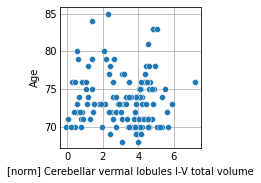

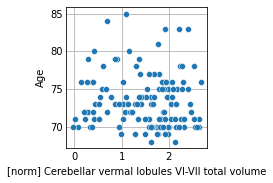

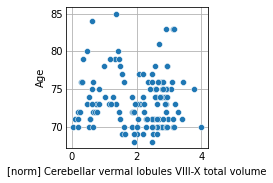

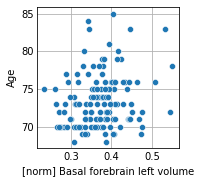

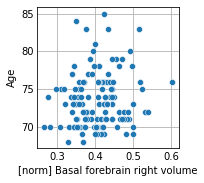

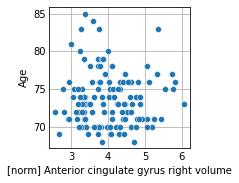

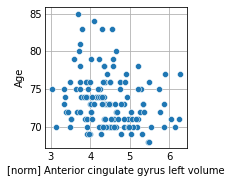

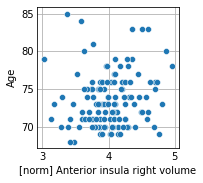

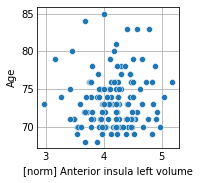

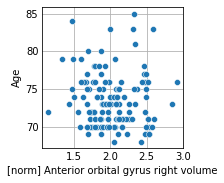

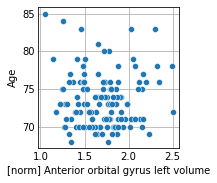

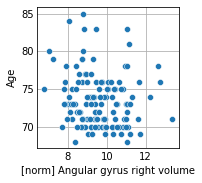

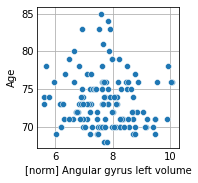

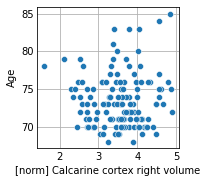

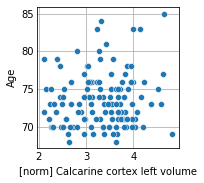

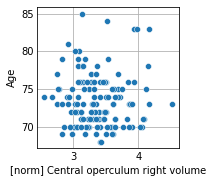

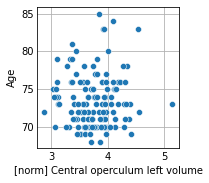

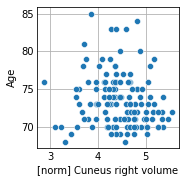

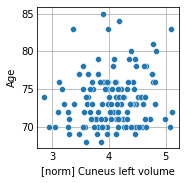

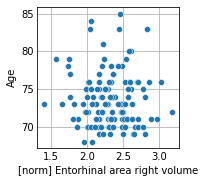

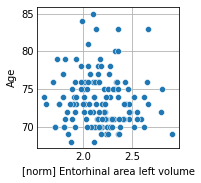

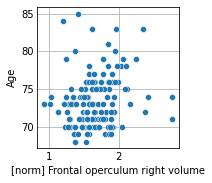

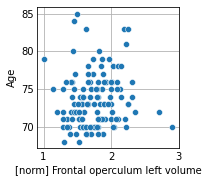

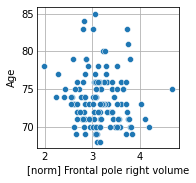

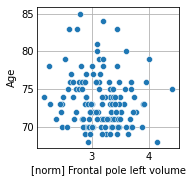

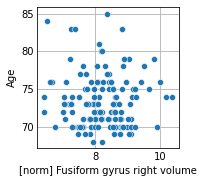

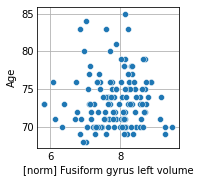

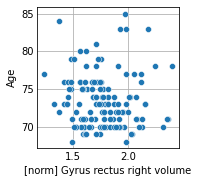

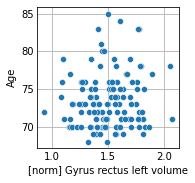

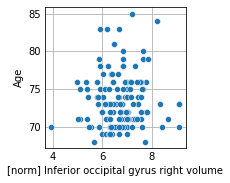

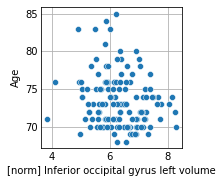

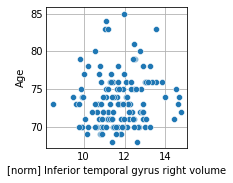

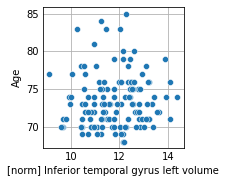

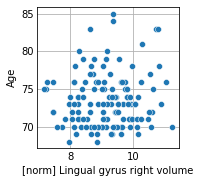

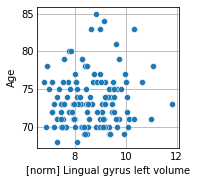

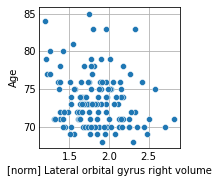

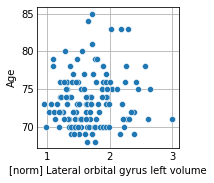

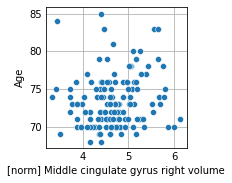

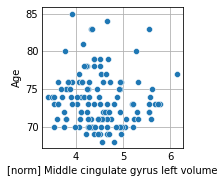

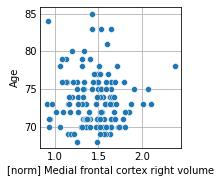

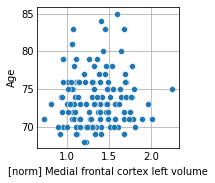

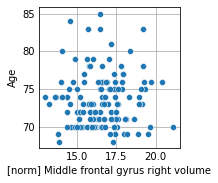

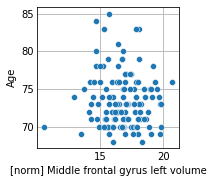

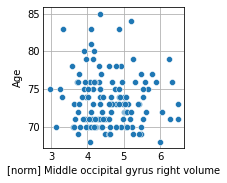

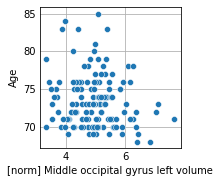

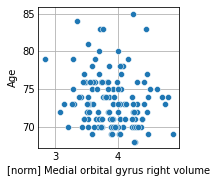

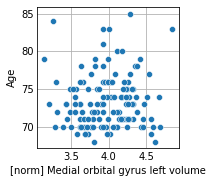

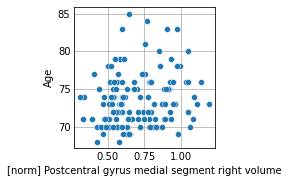

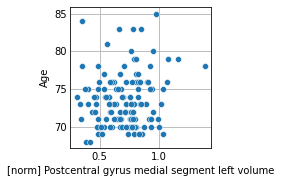

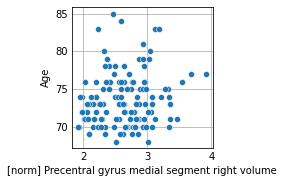

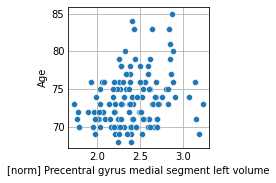

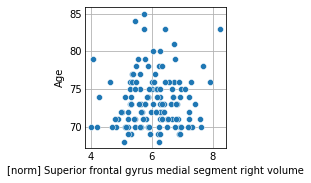

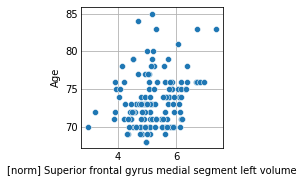

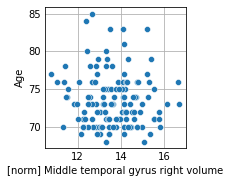

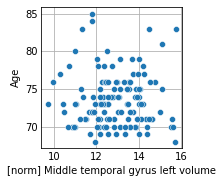

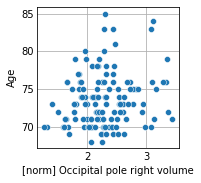

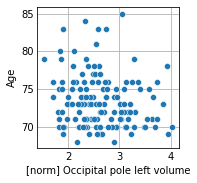

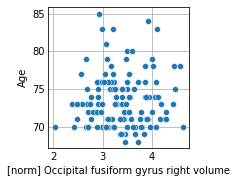

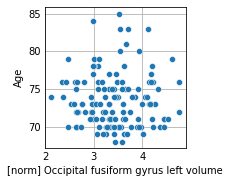

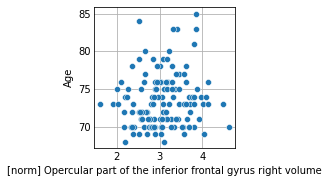

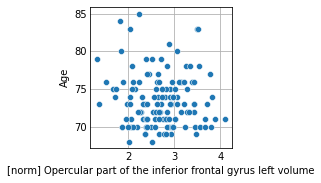

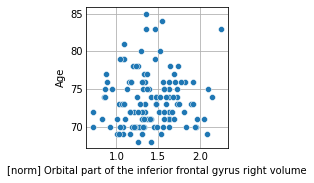

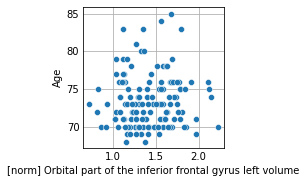

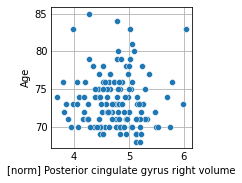

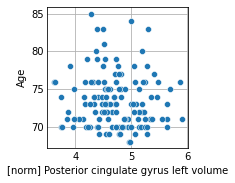

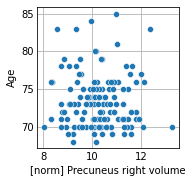

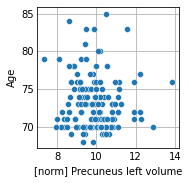

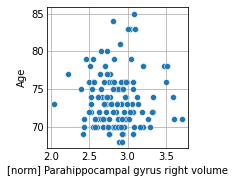

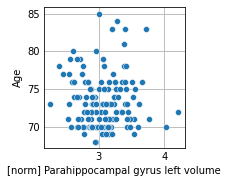

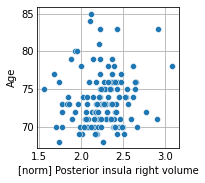

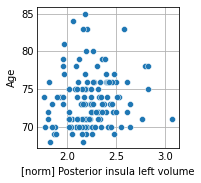

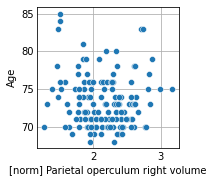

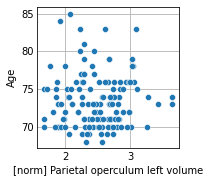

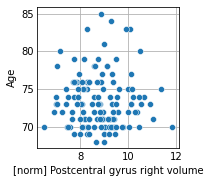

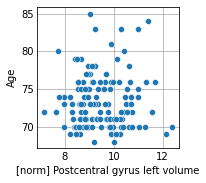

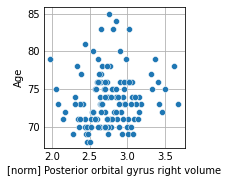

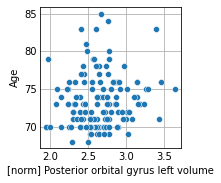

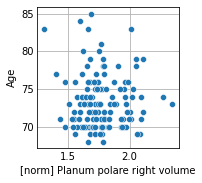

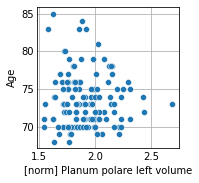

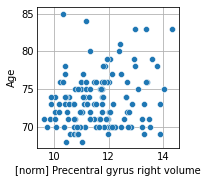

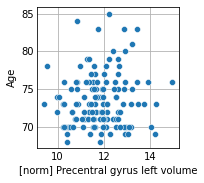

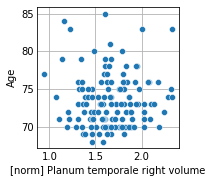

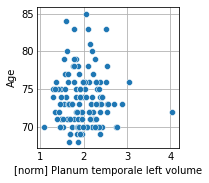

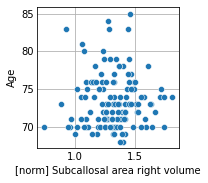

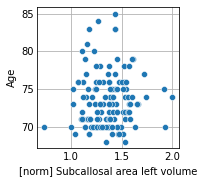

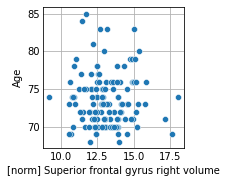

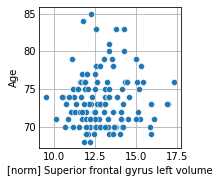

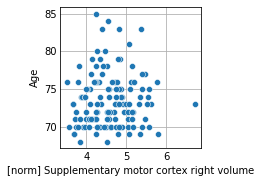

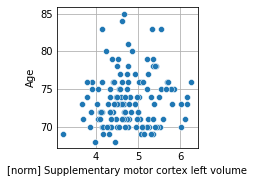

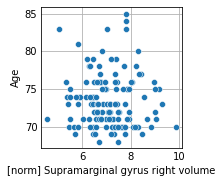

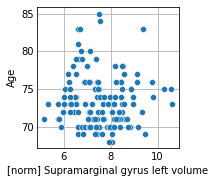

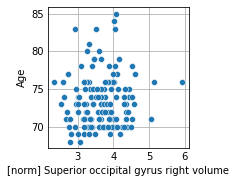

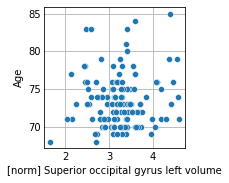

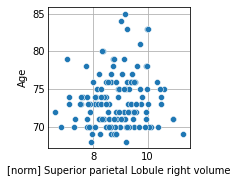

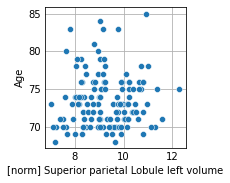

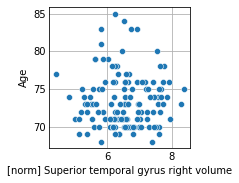

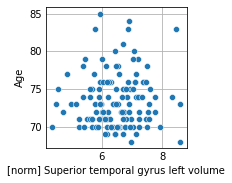

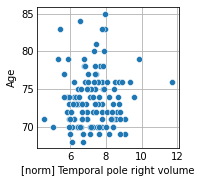

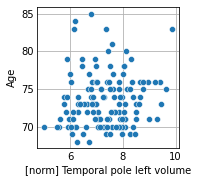

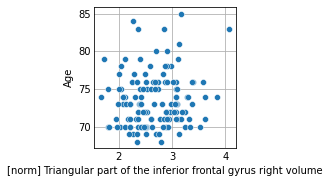

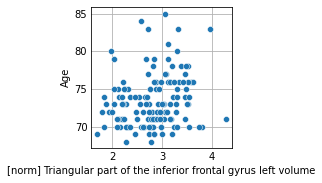

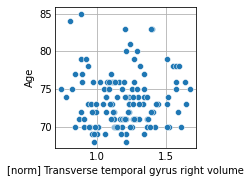

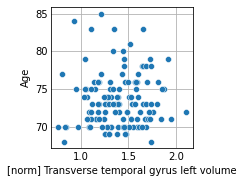

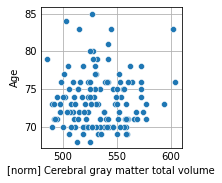

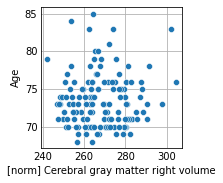

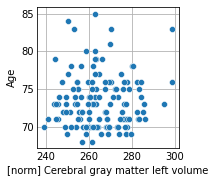

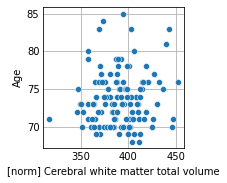

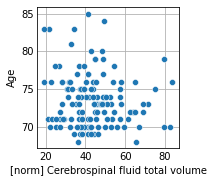

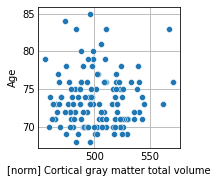

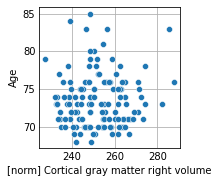

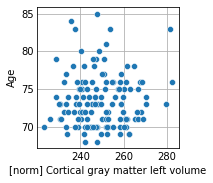

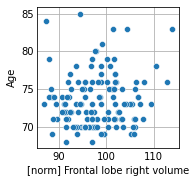

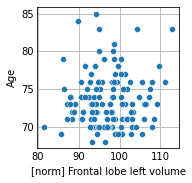

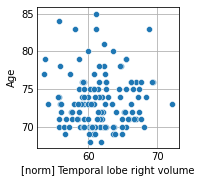

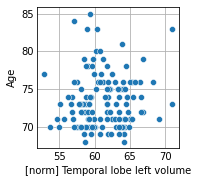

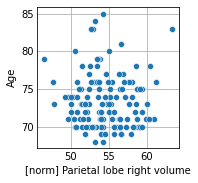

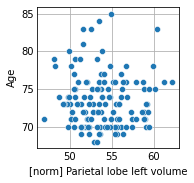

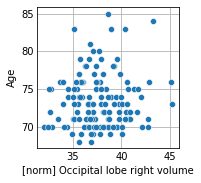

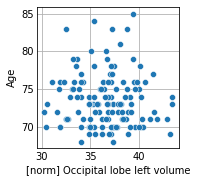

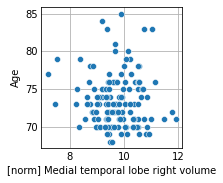

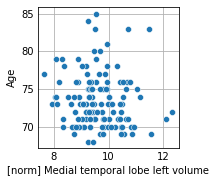

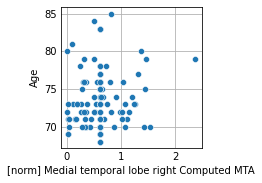

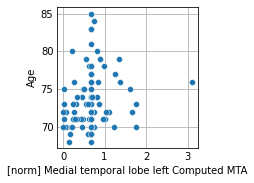

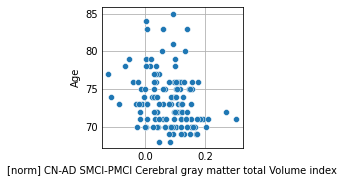

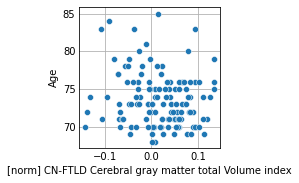

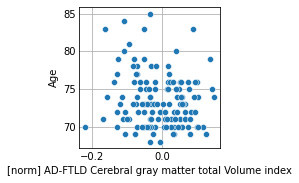

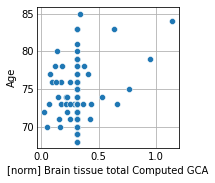

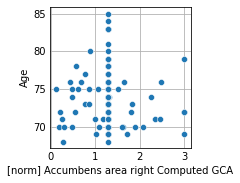

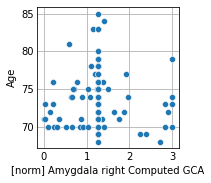

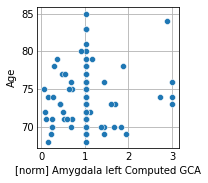

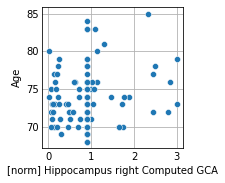

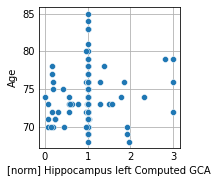

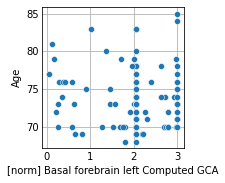

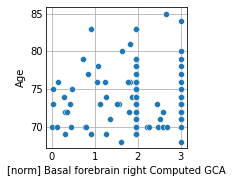

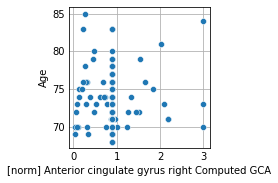

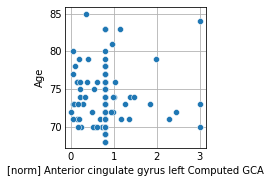

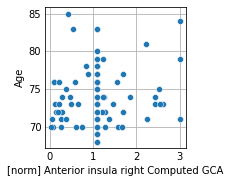

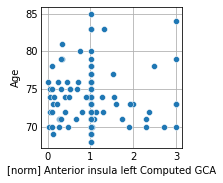

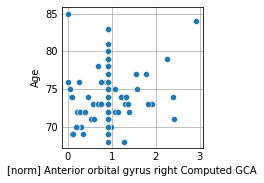

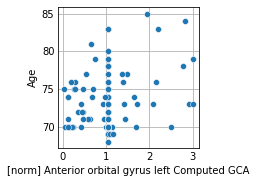

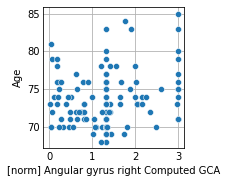

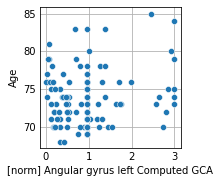

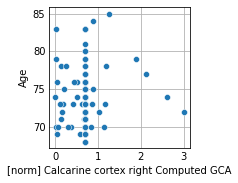

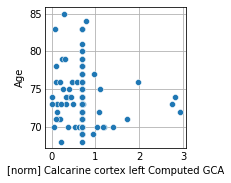

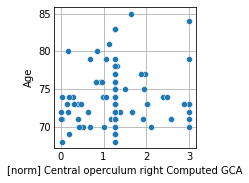

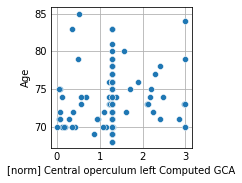

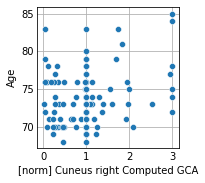

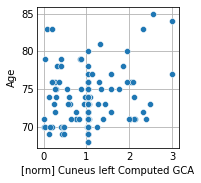

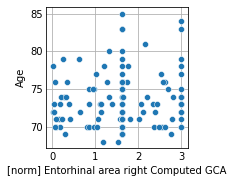

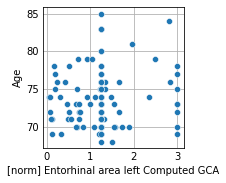

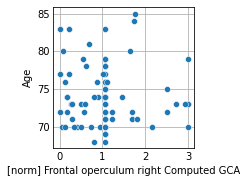

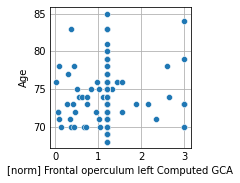

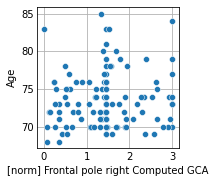

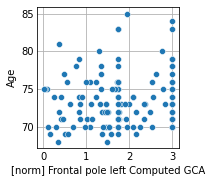

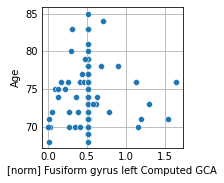

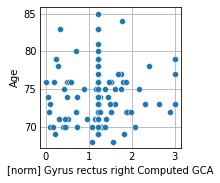

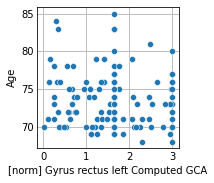

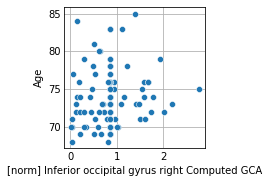

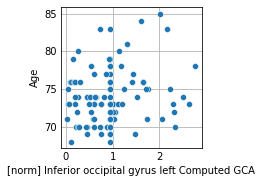

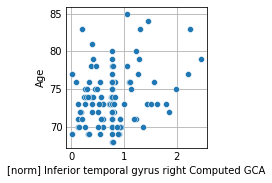

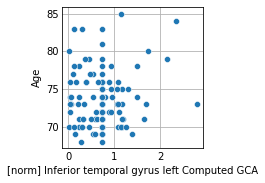

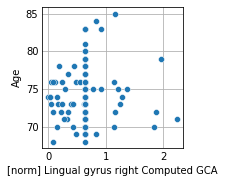

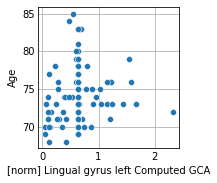

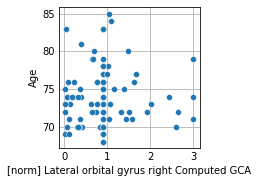

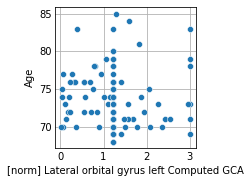

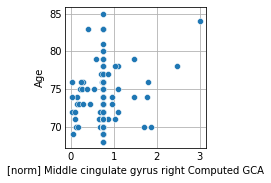

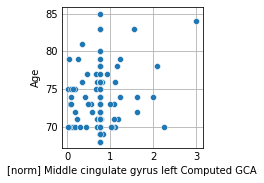

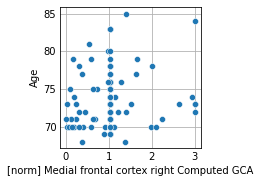

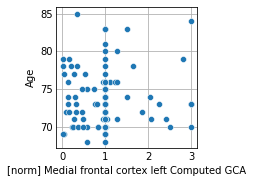

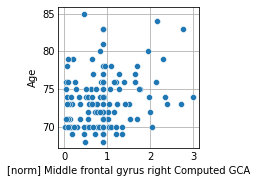

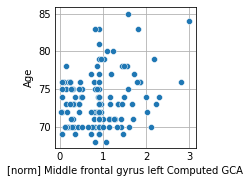

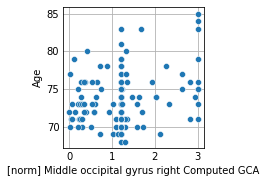

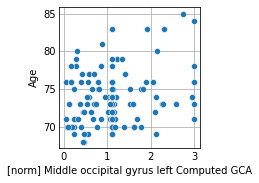

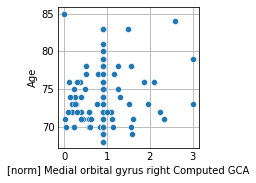

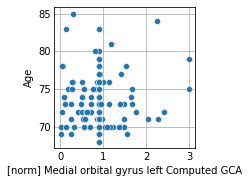

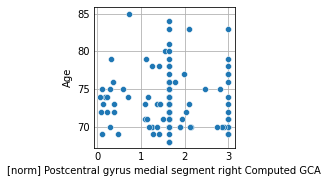

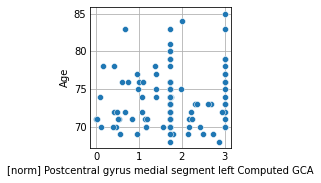

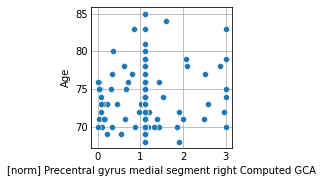

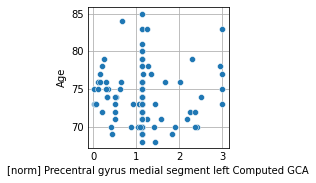

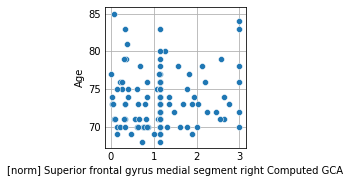

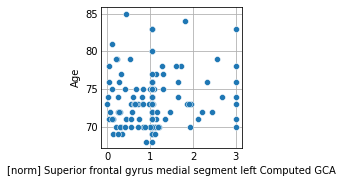

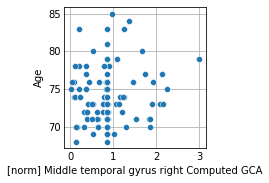

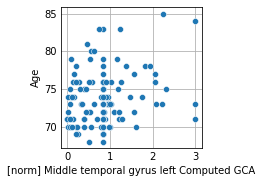

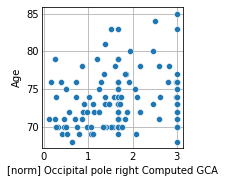

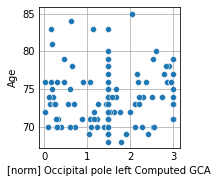

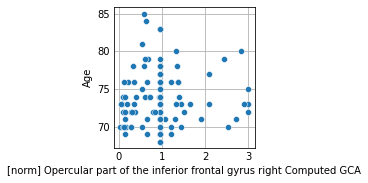

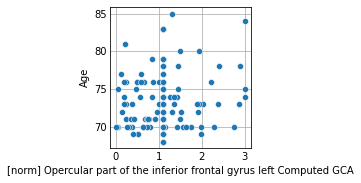

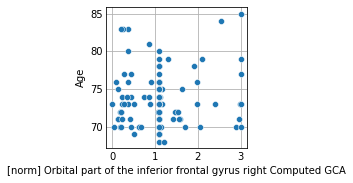

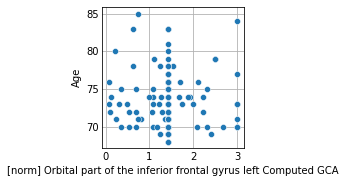

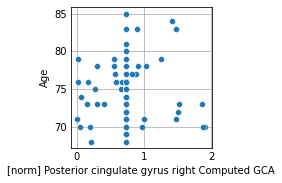

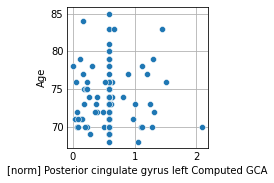

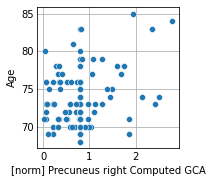

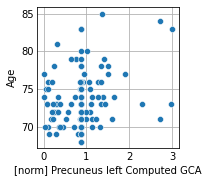

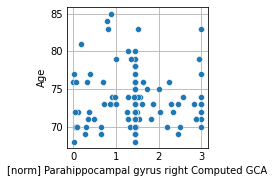

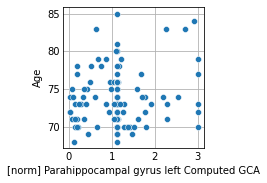

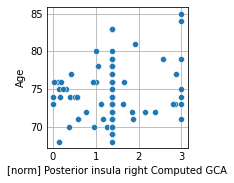

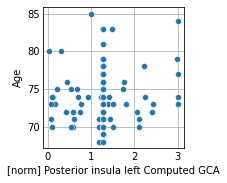

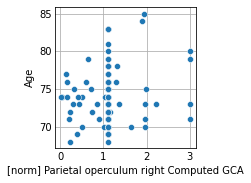

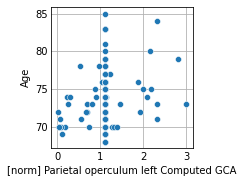

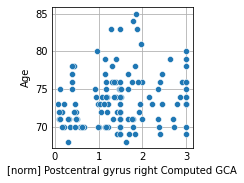

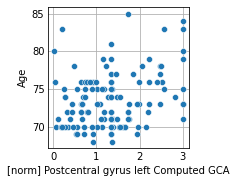

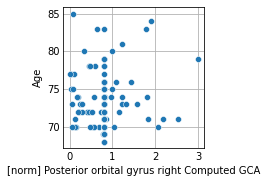

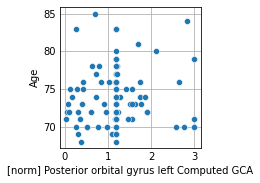

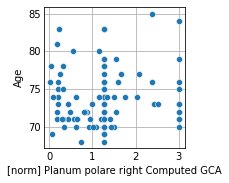

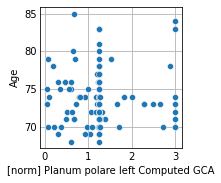

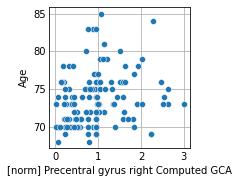

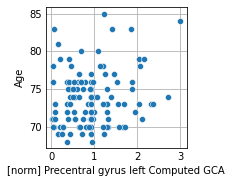

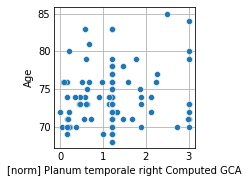

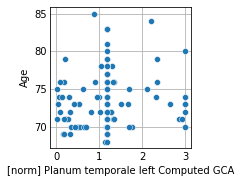

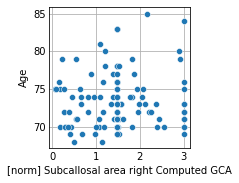

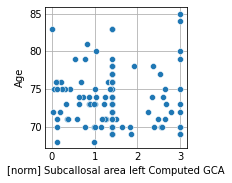

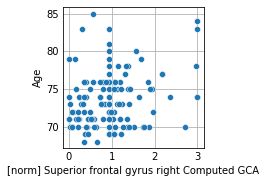

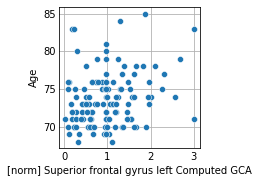

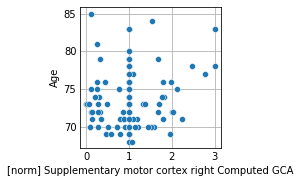

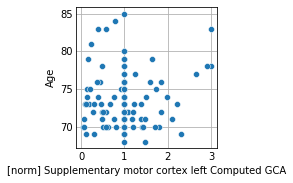

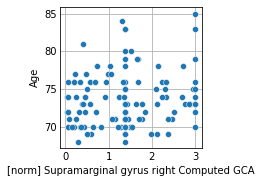

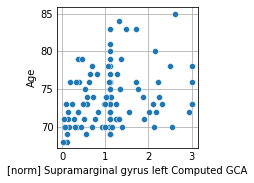

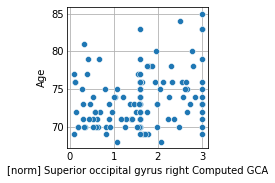

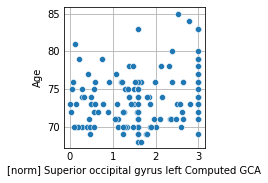

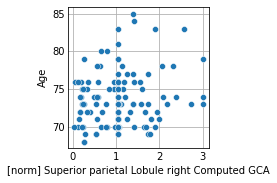

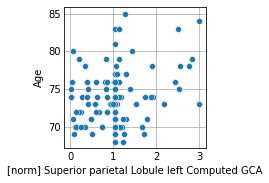

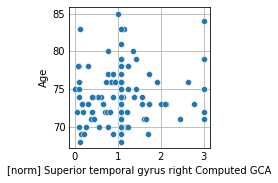

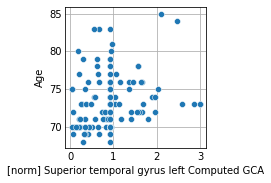

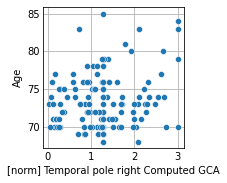

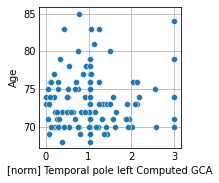

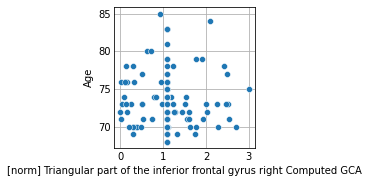

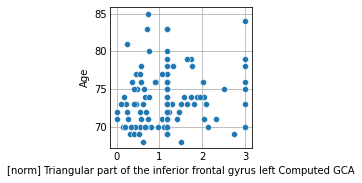

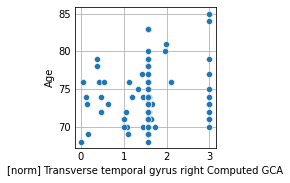

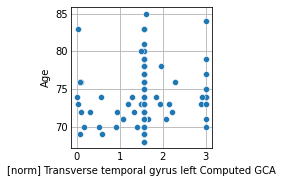

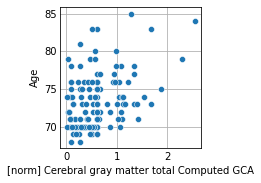

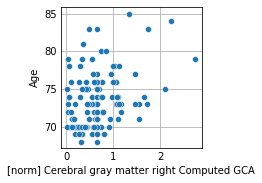

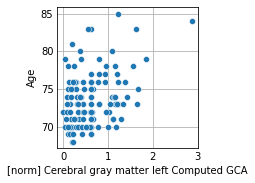

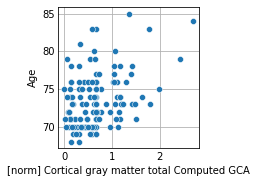

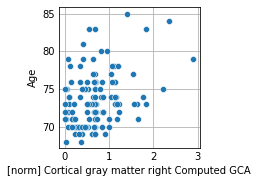

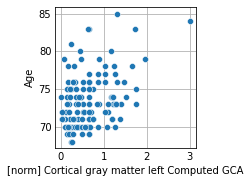

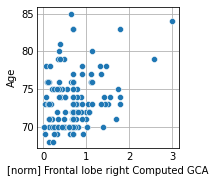

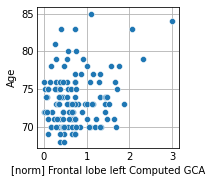

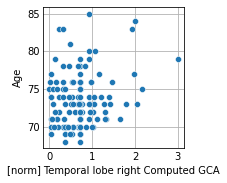

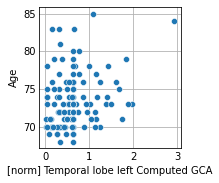

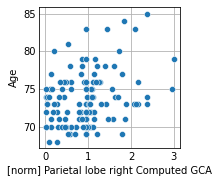

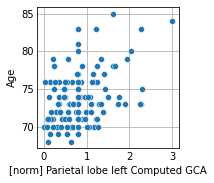

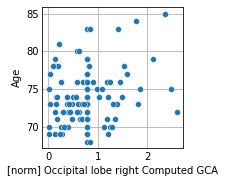

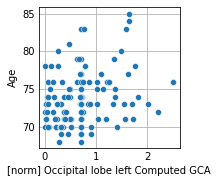

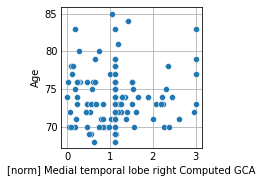

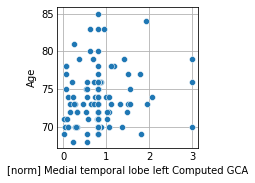

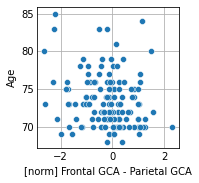

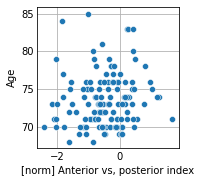

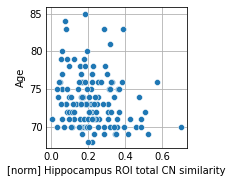

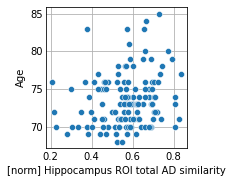

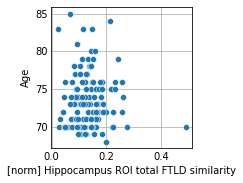

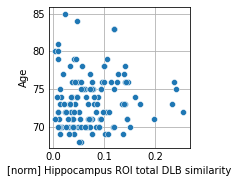

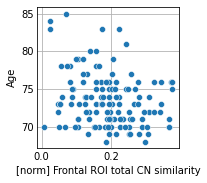

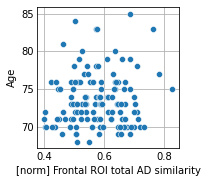

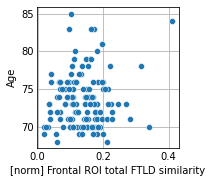

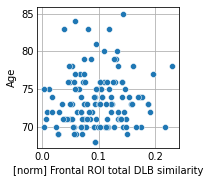

In [99]:
pp = PdfPages('scatterplots.pdf')

for i in range(tx_train.shape[1]):
    plt.figure()
    sns.scatterplot(x=tx_train[:,i],y=labels)
    plt.xlabel(features_clean[i])
    plt.ylabel('Age')
    pp.savefig(plt.gcf(), bbox_inches='tight')
pp.close() 

# Polynomial Regression

In [428]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
x = tx_train[:,274]
x, y = zip(*sorted(zip(x,labels)))
x = np.array(x)
y = np.array(y)

NameError: name 'tx_train' is not defined

In [3]:
poly_reg_model = LinearRegression()
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

NameError: name 'LinearRegression' is not defined

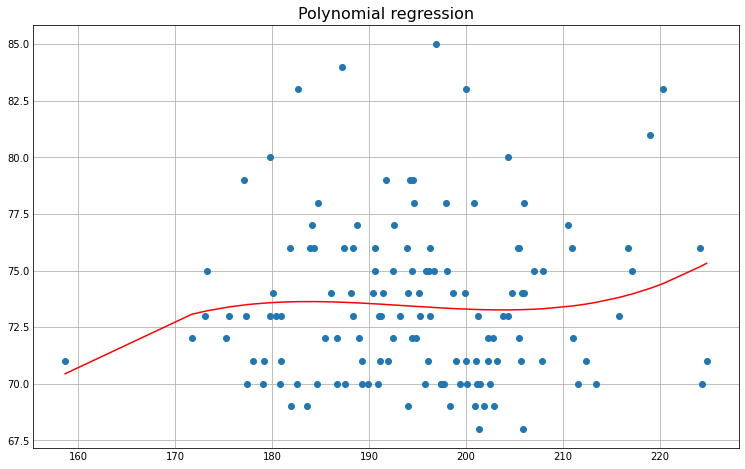

In [480]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial regression", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

# K-means and PCA

In [2]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
import sklearn as sk

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
# Import data
df = pd.read_excel('data.xlsx', 'Timepoint 1', header=1)

In [4]:
df = df.loc[:, (df != 0).any(axis=0)]

In [5]:
df['Sex'].replace({0:'Male', 1:'Female'}, inplace=True)

In [6]:
df = df.drop(['Patient ID', 'Batch Process ID'], axis=1)

In [7]:
# Split Sex in Sex_Female and Sex_Male
X = pd.get_dummies(df)

In [8]:
X.head()

Age  [norm] Brain tissue total volume  [norm] 3rd ventricle total volume  \
0   78                       1137.775513                           1.383373   
1   73                       1098.936401                           1.494219   
2   72                       1090.815918                           2.233665   
3   83                       1075.826172                           1.408936   
4   79                       1106.454956                           2.644484   

   [norm] 4th ventricle total volume  [norm] Accumbens area right volume  \
0                           1.910350                            0.348950   
1                           0.980164                            0.264819   
2                           1.718761                            0.301532   
3                           0.995975                            0.336343   
4                           2.989039                            0.296014   

   [norm] Accumbens area left volume  [norm] Amygdala right volume  \
0                           0.387004                      1.080408   
1                           0.286215                      0.707879   
2                           0.309297                      1.060310   
3                           0.332074                      0.919798   
4                           0.351317                      1.236609   

   [norm] Amygdala left volume  [norm] Brain stem total volume  \
0                     1.096665                       17.686428   
1                     0.867686                       19.344299   
2                     1.074240                       18.449440   
3                     1.079750                       17.840492   
4                     1.069212                       19.333385   

   [norm] Caudate right volume  ...  \
0                     3.737273  ...   
1                     3.026262  ...   
2                     2.515904  ...   
3                     3.004374  ...   
4                     2.938746  ...   

   [norm] Hippocampus ROI total CN similarity  \
0                                    0.287963   
1                                    0.307899   
2                                    0.000000   
3                                    0.079038   
4                                    0.086569   

   [norm] Hippocampus ROI total AD similarity  \
0                                    0.531243   
1                                    0.539312   
2                                    0.720699   
3                                    0.655258   
4                                    0.793982   

   [norm] Hippocampus ROI total FTLD similarity  \
0                                      0.080735   
1                                      0.139546   
2                                      0.195559   
3                                      0.147377   
4                                      0.109764   

   [norm] Hippocampus ROI total DLB similarity  \
0                                     0.100059   
1                                     0.013243   
2                                     0.083742   
3                                     0.118327   
4                                     0.009685   

   [norm] Frontal ROI total CN similarity  \
0                                0.158317   
1                                0.047856   
2                                0.047759   
3                                0.173150   
4                                0.105938   

   [norm] Frontal ROI total AD similarity  \
0                                0.573628   
1                                0.568571   
2                                0.710521   
3                                0.573771   
4                                0.658899   

   [norm] Frontal ROI total FTLD similarity  \
0                                  0.134063   
1                                  0.225532   
2                                  0.179374   
3                                  0.172354   
4                                  0.161051

In [9]:
# Categorical values
cater = X[['Sex_Female', 'Sex_Male']]

In [10]:
# Numerical values
numer = X.drop(['Sex_Female', 'Sex_Male'], axis=1)

In [11]:
#Initialize our scaler
scaler = StandardScaler()

In [12]:
#Scale each column in numer
numer = pd.DataFrame(scaler.fit_transform(numer), columns=numer.columns)

In [13]:
X_scaled = pd.concat([numer, cater], axis=1, join='inner')

In [14]:
X_scaled.head()

Age  [norm] Brain tissue total volume  \
0  1.287748                          0.480922   
1 -0.134764                         -0.784529   
2 -0.419267                         -1.049110   
3  2.710261                         -1.537504   
4  1.572251                         -0.539561   

   [norm] 3rd ventricle total volume  [norm] 4th ventricle total volume  \
0                          -0.663050                           0.362989   
1                          -0.429414                          -1.784112   
2                           1.129154                          -0.079246   
3                          -0.609169                          -1.747616   
4                           1.995059                           2.852872   

   [norm] Accumbens area right volume  [norm] Accumbens area left volume  \
0                            0.415506                           1.021022   
1                           -1.039827                          -1.084120   
2                           -0.404751                          -0.602015   
3                            0.197424                          -0.126281   
4                           -0.500203                           0.275641   

   [norm] Amygdala right volume  [norm] Amygdala left volume  \
0                      0.361992                     0.399141   
1                     -2.792113                    -1.700631   
2                      0.191827                     0.193500   
3                     -0.997851                     0.244028   
4                      1.684504                     0.147393   

   [norm] Brain stem total volume  [norm] Caudate right volume  ...  \
0                       -0.429232                     1.916728  ...   
1                        0.797189                     0.030552  ...   
2                        0.135211                    -1.323329  ...   
3                       -0.315262                    -0.027512  ...   
4                        0.789115                    -0.201611  ...   

   [norm] Hippocampus ROI total CN similarity  \
0                                    0.551605   
1                                    0.709333   
2                                   -1.726678   
3                                   -1.101352   
4                                   -1.041769   

   [norm] Hippocampus ROI total AD similarity  \
0                                   -0.326933   
1                                   -0.264156   
2                                    1.147044   
3                                    0.637910   
4                                    1.717189   

   [norm] Hippocampus ROI total FTLD similarity  \
0                                     -0.912154   
1                                      0.060779   
2                                      0.987424   
3                                      0.190330   
4                                     -0.431916   

   [norm] Hippocampus ROI total DLB similarity  \
0                                     0.526022   
1                                    -1.138286   
2                                     0.213216   
3                                     0.876229   
4                                    -1.206495   

   [norm] Frontal ROI total CN similarity  \
0                               -0.381228   
1                               -1.680973   
2                               -1.682114   
3                               -0.206695   
4                               -0.997548   

   [norm] Frontal ROI total AD similarity  \
0                               -0.015282   
1                               -0.072236   
2                                1.526454   
3                               -0.013672   
4                                0.945069   

   [norm] Frontal ROI total FTLD similarity  \
0                                 -0.070934   
1                                  1.356935   
2                                  0.636389   
3                                  0.526804   
4                 

In [83]:
kmeans = KMeans(n_clusters=3)

In [84]:
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

In [85]:
clusters = kmeans.predict(X_scaled)

In [86]:
X_scaled["Cluster"] = clusters

In [87]:
plotX = X_scaled.copy()

In [88]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [89]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [90]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [91]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [92]:
plotX["dummy"] = 0

In [93]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

### PCA Visualization

In [79]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

In [94]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [96]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)


data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [100]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# Elastic Net

In [56]:
import math
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

In [57]:
x = X_scaled.drop(['Age'], axis=1)
y = X['Age']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but ElasticNet was fitted without feature names



train_accuracy: 0.3490566037735849
test_accuracy: 0.2222222222222222
max error : 0.0
min error : 0.0
mean : 0.0
std : 0.0


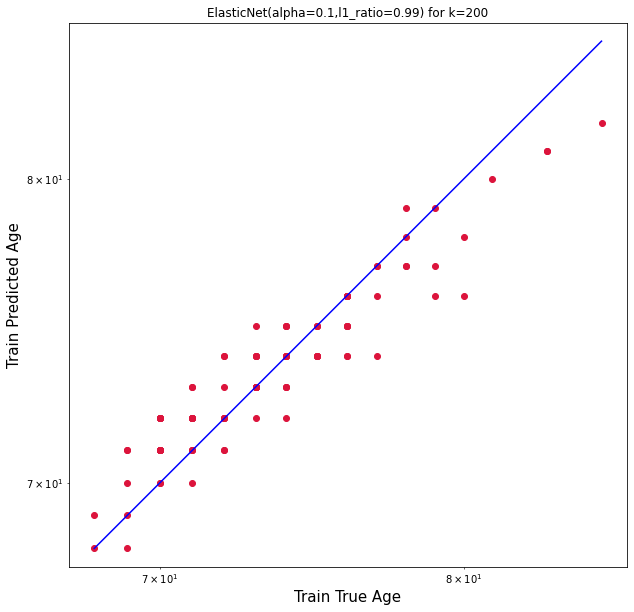

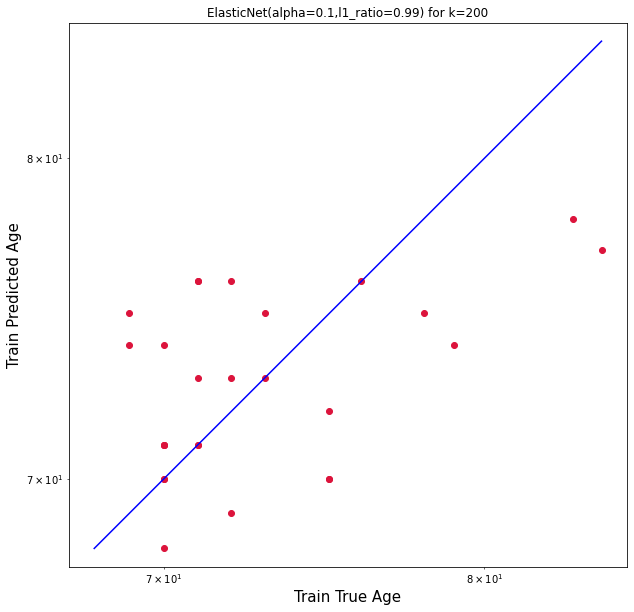

In [91]:
k = 200
l1_ratio = 0.99
alpha = 0.1

# Select top k features
select = SelectKBest(f_regression, k=k)
new_x_train = select.fit_transform(x_train, y_train)

selected_features = select.get_feature_names_out()
new_x_test = x_test[selected_features]

model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio).fit(new_x_train, y_train)

# Predict age
y_train_predict = model.predict(new_x_train)
y_test_predict = model.predict(new_x_test)

# Compute error
y_train_predict = np.round(y_train_predict)
y_test_predict = np.round(y_test_predict)

train_error = y_train_predict - y_train
test_error = y_test_predict - y_test

train_accuracy = np.sum(train_error == 0)/train_error.shape[0]
test_accuracy = np.sum(test_error == 0)/test_error.shape[0]

print(f'train_accuracy: {train_accuracy}')
print(f'test_accuracy: {test_accuracy}')

print(f'max error : {max(error_train)}')
print(f'min error : {min(error_train)}')
print(f'mean : {np.mean(error_train)}')
print(f'std : {np.std(error_train)}')

 # Plot
plt.figure(figsize=(10,10))
plt.scatter(np.array(y_train, dtype='int'), np.array(y_train_predict, dtype='int'), c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_train_predict), max(y_train))
p2 = min(min(y_train_predict), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title(f'ElasticNet(alpha={alpha},l1_ratio={l1_ratio}) for k={k}')
plt.xlabel('Train True Age', fontsize=15)
plt.ylabel('Train Predicted Age', fontsize=15)
plt.axis('equal')
plt.show()


 # Plot
plt.figure(figsize=(10,10))
plt.scatter(np.array(y_test, dtype='int'), np.array(y_test_predict, dtype='int'), c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test_predict), max(y_test))
p2 = min(min(y_test_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title(f'ElasticNet(alpha={alpha},l1_ratio={l1_ratio}) for k={k}')
plt.xlabel('Train True Age', fontsize=15)
plt.ylabel('Train Predicted Age', fontsize=15)
plt.axis('equal')
plt.show()

for k in [10, 20, 50, 100, 200]:
    print(f'Testing k = {k}')
    # Select top k features
    new_x = SelectKBest(f_regression, k=k).fit_transform(x, y)

    # Set model
    model = ElasticNet()

    # Define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    # define grid
    grid = dict()
    grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0]
    grid['l1_ratio'] = np.arange(0, 1, 0.01)

    # define search
    print('Starting grid search...')
    search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1, verbose=10)

    # perform the search
    results = search.fit(new_x, y)

    # summarize
    print('MAE: %.3f' % results.best_score_)
    print('Config: %s' % results.best_params_)

    # Retrieve best model
    best_alpha = results.best_params_['alpha']
    best_l1_ratio = results.best_params_['l1_ratio']
    best = ElasticNet(alpha=best_alpha,l1_ratio=best_l1_ratio).fit(new_x, y)

    # Predict age
    y_predict = best.predict(new_x)

    # Compute error
    error = y_predict - y
    print(f'max error : {max(error)}')
    print(f'min error : {min(error)}')
    print(f'mean : {np.mean(error)}')
    print(f'std : {np.std(error)}')

    # Plot
    plt.figure(figsize=(10,10))
    plt.scatter(np.array(y, dtype='int'), np.array(y_predict, dtype='int'), c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_predict), max(y))
    p2 = min(min(y_predict), min(y))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(f'ElasticNet(alpha={best_alpha},l1_ratio={best_l1_ratio}) for k={k}')
    plt.xlabel('True Age', fontsize=15)
    plt.ylabel('Predicted Age', fontsize=15)
    plt.axis('equal')
    plt.show()